In [6]:
captions_path = '../example_data/pubmed_set/captions.json'
images_path = '../example_data/pubmed_set/images'
plip_embeddings = '../example_data/embeddings/plip_text_embeddings.json'
biowordvec_embeddings = '../example_data/embeddings/bioWordVec_embeddings.json'
pubmedbert_embeddings = '../example_data/embeddings/pubmedbert_embeddings.json'
biowordvec_path = './model_files/BioWordVec_PubMed_MIMICIII_d200.vec.bin'

caption1 = 'The tumor in the omentum with identical cytomorphologic features; monomorphic cells with associated psammoma bodies. Hematoxylin and eosin stain, original magnification: x40.'
caption2 = 'Erosion of pneumocytes (arrow) in the alveolar wall: defect of pneumocytes and inflammatory cell infiltration (EMA immunostaining). No intracytoplasmic inclusions are noted. The tissue sample is from a patient with non-specific interstitial pneumonia. Bar, 100 mum.'

In [7]:
from models import PLIP_Embedder
from models import BioWordVec_Embedder
from models import PubMedBERT_Embedder

# Loading Models using precomputed embeddings (BioWordVec will take awhile to run)
plip = PLIP_Embedder(captions_path, images_path, plip_embeddings)
biowordvec = BioWordVec_Embedder(biowordvec_path, captions_path, images_path, biowordvec_embeddings)
pubmedbert = PubMedBERT_Embedder(captions_path, images_path, pubmedbert_embeddings)

Loading PLIP model...
model loaded.
Parsing captions json...
loading BioWordVec model...
model loaded.
Parsing captions json...


No sentence-transformers model found with name microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext. Creating a new one with mean pooling.


Parsing captions json...


In [8]:
# Find the similarity scores of two captions.
plip.getSimilarityScore(caption1, caption2)

Map: 100%|██████████| 1/1 [00:00<00:00,  8.26 examples/s]
1it [00:00,  6.09it/s]
Map: 100%|██████████| 1/1 [00:00<00:00, 92.37 examples/s]
1it [00:00, 17.98it/s]


tensor([0.5092])

getting similarity scores...


Map: 100%|██████████| 1/1 [00:00<00:00, 142.79 examples/s]
1it [00:00, 14.55it/s]


1.
UUID: f01f58d4-5313-4d8f-8e02-bdd66679a628
CaptionThe tumour is dispersed by lymphocytes, eosinophils, histiocytes and plasma cells (high power image).
Eval Score: 0.8722535371780396


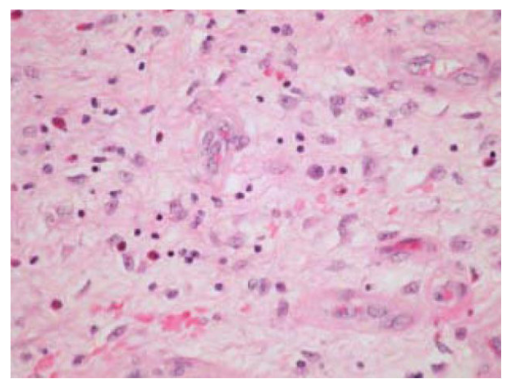

2.
UUID: 4512cc83-8ef6-492c-8efa-af868ef204c6
CaptionMedium power image illustrates the plasma cells and lymphocytes surrounding the tumor.
Eval Score: 0.8624177575111389


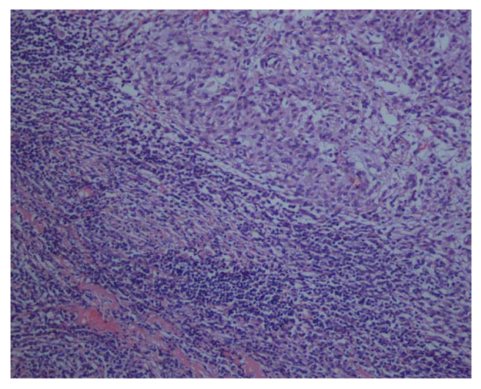

3.
UUID: 3c3dfa45-6749-430e-abc6-51e5192a9fc2
CaptionPlasma cells.
Eval Score: 0.8416095972061157


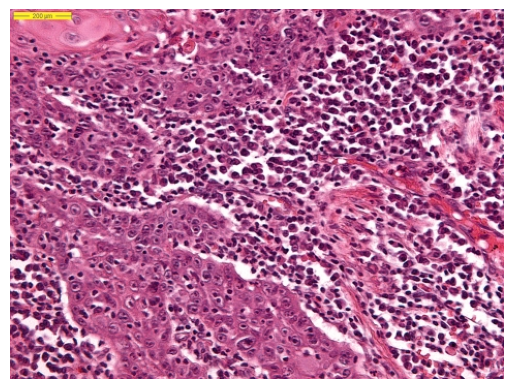

4.
UUID: fc8cdce3-a0f2-4819-8d04-1ea7dfc159b3
CaptionNegative result of patients sample
Eval Score: 0.821631133556366


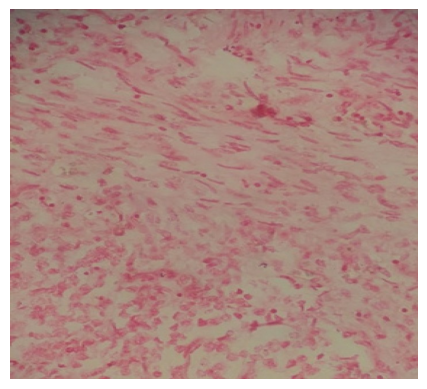

5.
UUID: c4129095-d7d7-4010-a2be-47e83725b0ba
CaptionNeoplastic lymphoid cells display scanty cytoplasm, large nucleolus, and prominent nucleoli. Atypical mitotic figures are also seen.
Eval Score: 0.8154315948486328


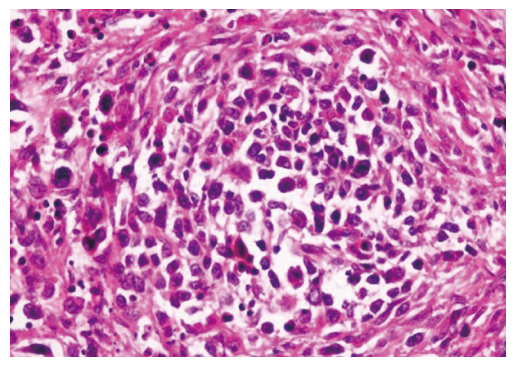

In [10]:
# Query 5 top captions
results = plip.getSimilarityScores('carcinoma of the lymphocytes')
plip.showResults(results)

getting similarity scores...
1.
UUID: 9753a6a5-5033-4839-a784-104f7731815d
CaptionHistopathological pictures showing Langhan's cell at x100
Eval Score: 0.8895350098609924


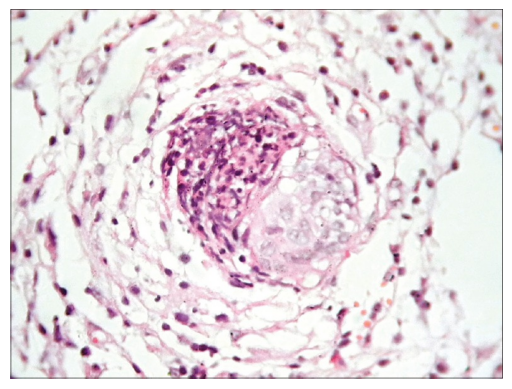

2.
UUID: 6612ccab-758f-4e68-8090-59e1b896f517
CaptionPhotomicrograph of carcinomatous component (adenocarcinoma) (H&E stain, x200)
Eval Score: 0.8861601948738098


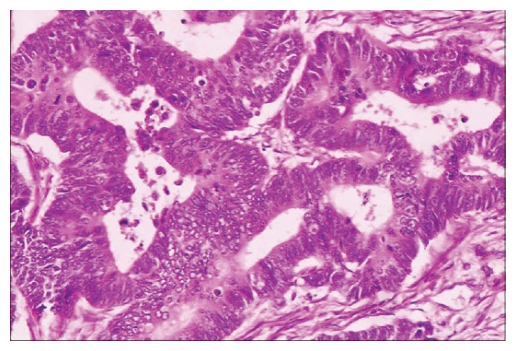

3.
UUID: 831c3bf3-5a44-4fc4-b535-52682c963e6a
CaptionPhotomicrograph of primitive neuroectodermal component (H&E stain, x400)
Eval Score: 0.8792836666107178


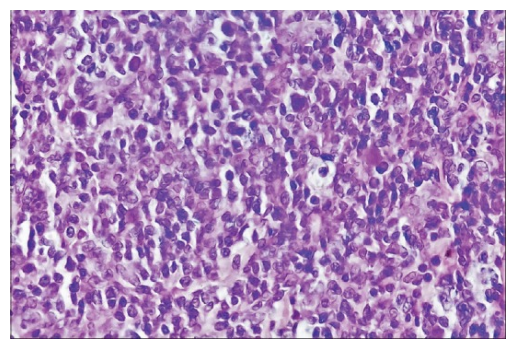

4.
UUID: d0f29751-93cb-4ac1-85a1-def145de7806
CaptionPhotomicrograph of squamous component (H&E stain, x100). Inset: High power view of keratin pearl (H&E stain, x400)
Eval Score: 0.8792836666107178


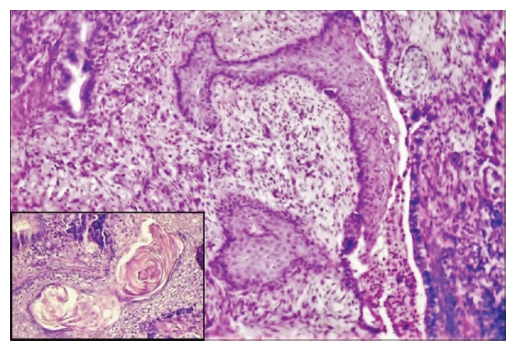

5.
UUID: a0b7bcac-5124-4b9d-bbd2-cab8ce146f04
CaptionThe microscopic appearance of granular cell (under x40 magnification)
Eval Score: 0.8724045157432556


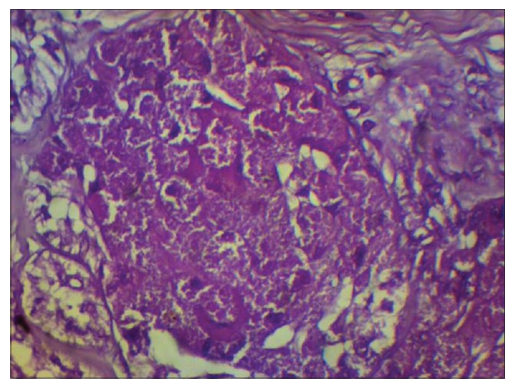

In [11]:
results = biowordvec.getSimilarityScores("inflammatory cell infiltrate")
biowordvec.showResults(results)

getting similarity scores...
1.
UUID: 294e5be3-c05d-4f3f-8e2c-bf43c1863347
CaptionUnspecific cytoplasmic staining in alveolar macrophages
Eval Score: 0.9643586277961731


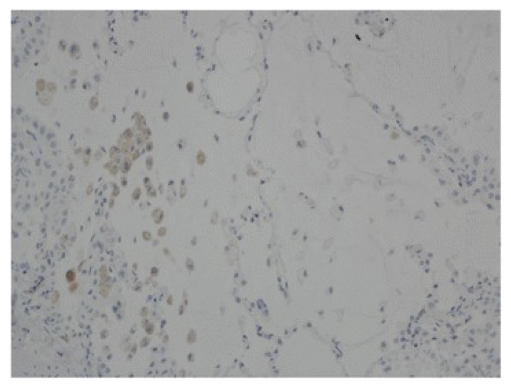

2.
UUID: 403c1488-6ac1-4dbd-9434-6c94b72145a9
CaptionLow magnification view showing necrotizing histiocytic inflammation
Eval Score: 0.9606955647468567


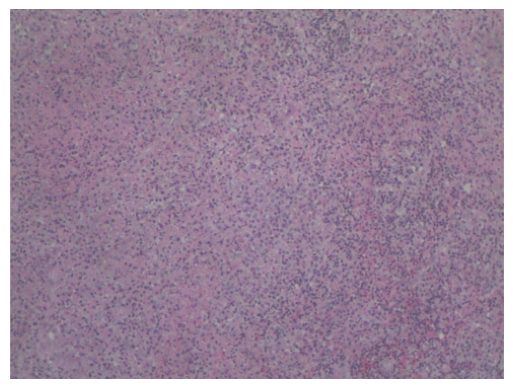

3.
UUID: 20eab117-406b-4f77-92b7-adffa623995d
CaptionGlobular cysts surrounded by heavy inflammatory cells
Eval Score: 0.9605891108512878


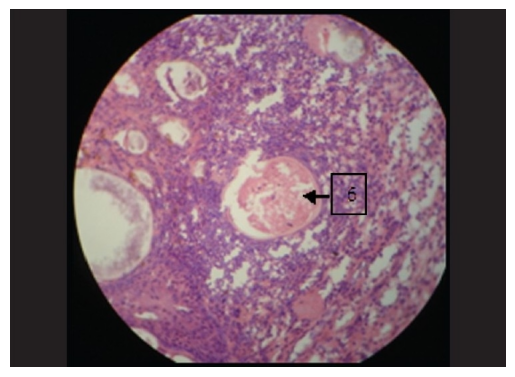

4.
UUID: d0e0be61-9e18-44ba-95f8-5191798f1ccb
CaptionIntense stromal inflammation with areas of necrosis
Eval Score: 0.9598518013954163


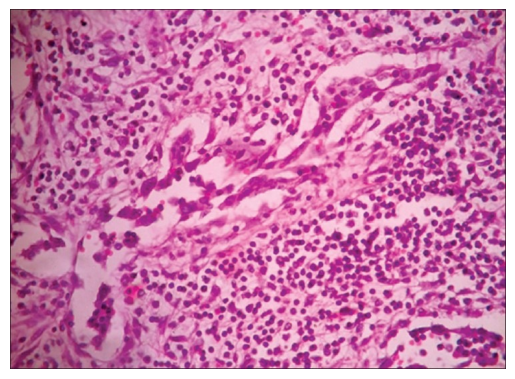

5.
UUID: dec30a4a-7d0a-4b6f-a9f3-61cbb6ab6c48
CaptionAggregation of Large Cells With Abundant Cytoplasm
Eval Score: 0.957656979560852


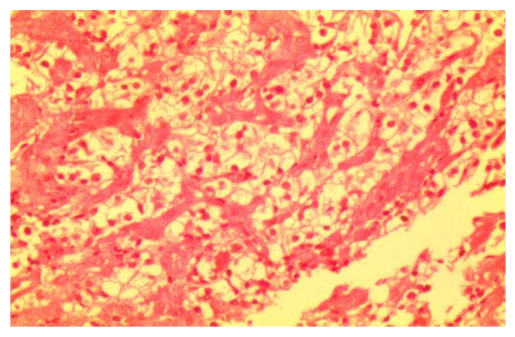

In [12]:
results = pubmedbert.getSimilarityScores("inflammatory cell infiltrate")
biowordvec.showResults(results)